In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-song-attributes/Spotify_Song_Attributes.csv


# Load Data Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#Load data

df = pd.read_csv('/kaggle/input/spotify-song-attributes/Spotify_Song_Attributes.csv')
df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


# Exploratory Data Analysis

In [4]:
#check shape of the data
df.shape

(10080, 22)

In [5]:
#check data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

**We have a total of 22 columns/variables with a combination of categorical and numeric variables. We can see a few missing data in the result above. Data has 10080 unique entries**



In [6]:
df.nunique().sort_values(ascending=False)

msPlayed            4979
trackName           4815
analysis_url        4736
track_href          4736
uri                 4736
id                  4736
duration_ms         4485
tempo               4234
loudness            3965
artistName          2312
instrumentalness    1927
acousticness        1889
valence             1137
energy              1066
speechiness         1001
liveness             978
danceability         762
genre                523
key                   12
time_signature         5
mode                   2
type                   1
dtype: int64

In [7]:
#descriptive stats

df.describe().T

,count,mean,std,min,25%,50%,75%,max
msPlayed,10080.0,1.519657e+06,5.317343e+06,0.000000,136780.0000,266287.500000,1.186307e+06,1.583671e+08
danceability,9530.0,6.024687e-01,1.577448e-01,0.000000,0.5090,0.623000,7.140000e-01,9.760000e-01
energy,9530.0,5.635241e-01,2.435482e-01,0.001080,0.4030,0.589000,7.510000e-01,9.990000e-01
key,9530.0,5.241973e+00,3.570615e+00,0.000000,2.0000,5.000000,8.000000e+00,1.100000e+01
loudness,9530.0,-8.685077e+00,5.414814e+00,-42.044000,-10.1890,-7.218000,-5.336000e+00,3.010000e+00
mode,9530.0,6.123820e-01,4.872322e-01,0.000000,0.0000,1.000000,1.000000e+00,1.000000e+00
speechiness,9530.0,7.846768e-02,8.010093e-02,0.000000,0.0361,0.047900,8.190000e-02,9.660000e-01
acousticness,9530.0,3.629236e-01,3.343372e-01,0.000002,0.0538,0.245000,6.680000e-01,9.960000e-01
instrumentalness,9530.0,1.532150e-01,3.131324e-01,0.000000,0.0000,0.000025,2.760000e-02,9.930000e-01
liveness,9530.0,1.745891e-01,1.307488e-01,0.024900,0.0962,0.119000,2.090000e-01,9.640000e-01


**Observations**

- Track named forever is the most frequently played track
- Artist named blackbear is the most frequently played artist 
- The average duration of music played is 1519657.4 miliseconds (25mins)
- Alt z (alternative hip hop) is the most frequently played genre
- The data has 523 unique genres with alt z being the most frequently played
- We can also analyze other musical characteristics such as danceability, energy, speechiness, etc.
- Average track duration is 202931.0 ms (~3.9 mins)

# Data Cleaning & Preprocessing

In [8]:
df.isnull().sum()

trackName              0
artistName             0
msPlayed               0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
type                 550
id                   550
uri                  550
track_href           550
analysis_url         550
duration_ms          550
time_signature       550
dtype: int64

In [9]:
percent_missing_data = df.isnull().sum() / len(df) * 100
percent_missing_data

trackName            0.000000
artistName           0.000000
msPlayed             0.000000
genre               14.880952
danceability         5.456349
energy               5.456349
key                  5.456349
loudness             5.456349
mode                 5.456349
speechiness          5.456349
acousticness         5.456349
instrumentalness     5.456349
liveness             5.456349
valence              5.456349
tempo                5.456349
type                 5.456349
id                   5.456349
uri                  5.456349
track_href           5.456349
analysis_url         5.456349
duration_ms          5.456349
time_signature       5.456349
dtype: float64

**Observation** 
 - There are some missing values in the dataset, particularly in the genre and various musical characteristic (ludness, speechiness, etc.) columns.
 - From this, we can see that the 'genre' column has the highest percentage of missing values (14.88%), followed by several other columns that each have 5.46% missing values.

In [10]:
missing_data_analysis = df[df.isnull().any(axis=1)].groupby('artistName')['genre'].agg(list).reset_index()
missing_data_analysis

,artistName,genre
0,$ober,"[nan, nan]"
1,2 Guys n the Parque,"[nan, nan]"
2,2ND CHOICE,"[nan, nan]"
3,2hz,"[nan, nan]"
4,3minem-norute,"[nan, nan]"
...,...,...
578,松永智也（ＣＶ：江口拓也）,"[nan, nan]"
579,物語シリーズ,"[nan, nan]"
580,直江剛（ＣＶ：内山昂輝）,"[nan, nan]"
581,羽柴夏樹（ＣＶ：松岡禎丞）,"[nan, nan]"


In [11]:
missing_data_analysis1 = df[df.isnull().any(axis=1)]
missing_data_analysis1

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
7,-Interlude-,NF,70589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,120,OQTAN,115125,NaN,0.806,0.945,8.0,-1.382,1.0,0.0486,...,0.2670,0.341,119.992,audio_features,1kdEXzn5xAyzTAzimbjhT4,spotify:track:1kdEXzn5xAyzTAzimbjhT4,https://api.spotify.com/v1/tracks/1kdEXzn5xAyz...,https://api.spotify.com/v1/audio-analysis/1kdE...,115125.0,4.0
24,1992,Bruises,20907439,NaN,0.579,0.851,5.0,-7.261,1.0,0.0278,...,0.2190,0.372,120.010,audio_features,537debqnr9NGTDEgnftd8y,spotify:track:537debqnr9NGTDEgnftd8y,https://api.spotify.com/v1/tracks/537debqnr9NG...,https://api.spotify.com/v1/audio-analysis/537d...,188000.0,4.0
26,2 AM,Marco Luka,172603,NaN,0.661,0.528,5.0,-9.347,0.0,0.0354,...,0.0920,0.137,150.004,audio_features,5j8xLQBvlVvTfLUDwyQX5S,spotify:track:5j8xLQBvlVvTfLUDwyQX5S,https://api.spotify.com/v1/tracks/5j8xLQBvlVvT...,https://api.spotify.com/v1/audio-analysis/5j8x...,172800.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10064,You're Going Down,Sick Puppies,89479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10065,You're Okay,brodyn,339524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10066,You're the One,Luca Fogale,436462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10067,YouDeserveSomethingBetter,Charles Luciano,2270178,NaN,0.807,0.289,2.0,-18.145,1.0,0.0912,...,0.0781,0.241,171.989,audio_features,5Ys91ZJMHtcPcqfWI5ethL,spotify:track:5Ys91ZJMHtcPcqfWI5ethL,https://api.spotify.com/v1/tracks/5Ys91ZJMHtcP...,https://api.spotify.com/v1/audio-analysis/5Ys9...,223328.0,4.0


From this sample, it seems that missing values can occur in any column and for any artist. For example, the genre column is missing for the track "Honest" by Nico Collins, and several columns are missing for the track "-Interlude-" by NF.

This suggests that the missing values may not be due to a specific artist or track. Instead, they could be due to issues with the data collection process, such as errors or limitations in the system used to gather the data.

In [12]:
#create a mapping for genre with artist name

artist_genre_mapping = df[df['genre'].notna()].groupby('artistName')['genre'].agg(lambda x: x.value_counts().index[0])
artist_genre_mapping_df = artist_genre_mapping.reset_index()
artist_genre_mapping_df

,artistName,genre
0,!!!,alternative dance
1,$NOT,aesthetic rap
2,$uicideboy$,cloud rap
3,11:11 Music Group,sad lo-fi
4,12 Stones,alternative metal
...,...,...
1823,ДЕТИ RAVE,hard bass
1824,フレンズ,japanese alternative rock
1825,ヨルシカ,j-pop
1826,内田彩,anime


Now I want to fill the missing data in genre column with the mapping we created above. However, there is a slight catch. For example if lets say an artist has equal occurences of genres, rock - twice, pop- twice, in such a case of tie, the code returns a one of the generes at random.

lets find the most tied artists -

In [13]:
# Create a mapping of artistName to the count of the most common genre
artist_genre_count_mapping = df[df['genre'].notna()].groupby('artistName')['genre'].agg(lambda x: x.value_counts().max())
# Find the artists where the count of the most common genre is less than the total count of genres for that artist
tied_genres_artists = artist_genre_count_mapping[artist_genre_count_mapping < df[df['genre'].notna()].groupby('artistName')['genre'].count()]
tied_genres_artists

artistName
!!!     2
ELIO    4
Name: genre, dtype: int64

Here we can see that there are only two such instance. Therefore we can impute data with most common genres for artists.

In [14]:
df['genre'] = df['genre'].fillna(df['artistName'].map(artist_genre_mapping))
df

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.1100,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.4740,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.2330,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0


In [15]:
df.isnull().sum()

trackName              0
artistName             0
msPlayed               0
genre               1252
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
type                 550
id                   550
uri                  550
track_href           550
analysis_url         550
duration_ms          550
time_signature       550
dtype: int64

**With the above imputation method we have imputed 250 data points, 1250 still remain, which is still a signifincant percentage. We will impute this with 'Unknown**

In [16]:
df['genre'] = df['genre'].fillna('Unknown')
df.isnull().sum()

trackName             0
artistName            0
msPlayed              0
genre                 0
danceability        550
energy              550
key                 550
loudness            550
mode                550
speechiness         550
acousticness        550
instrumentalness    550
liveness            550
valence             550
tempo               550
type                550
id                  550
uri                 550
track_href          550
analysis_url        550
duration_ms         550
time_signature      550
dtype: int64

In [17]:
dups = df.duplicated()
dups

0        False
1        False
2        False
3        False
4        False
         ...  
10075     True
10076     True
10077     True
10078     True
10079     True
Length: 10080, dtype: bool

In [18]:
df.duplicated().value_counts()

False    5040
True     5040
dtype: int64

**Observation**  50% of the data appear to be duplicated

In [19]:
df = df.drop_duplicates()
df.shape

(5040, 22)

In [20]:
df.duplicated().sum()

0

In [21]:
num_col = df.select_dtypes(include= ['int64','float64']).columns

In [22]:
import seaborn as sns
# identify all numerical cols

num_col = df.select_dtypes(include= ['int64','float64']).columns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


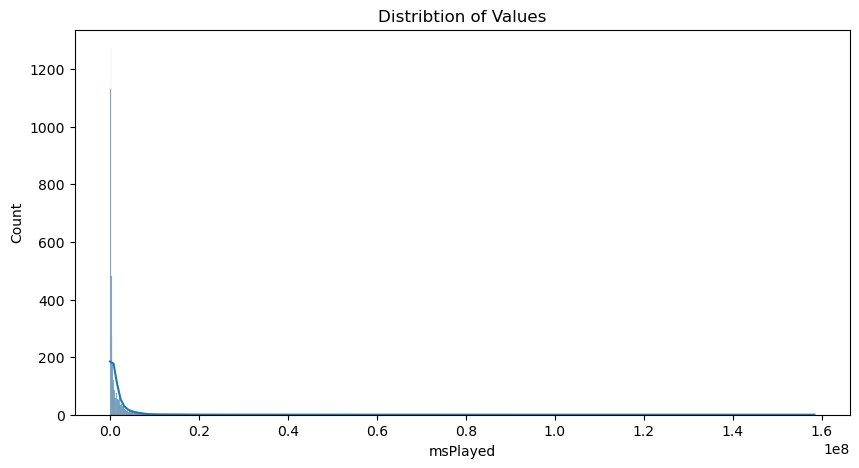

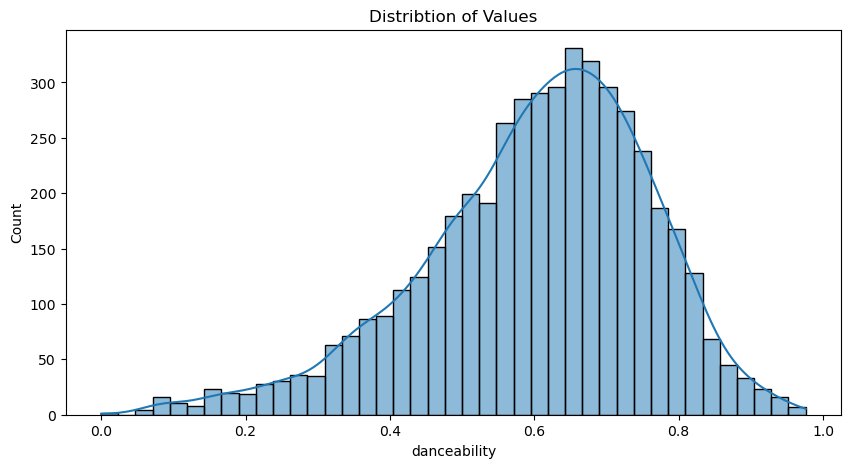

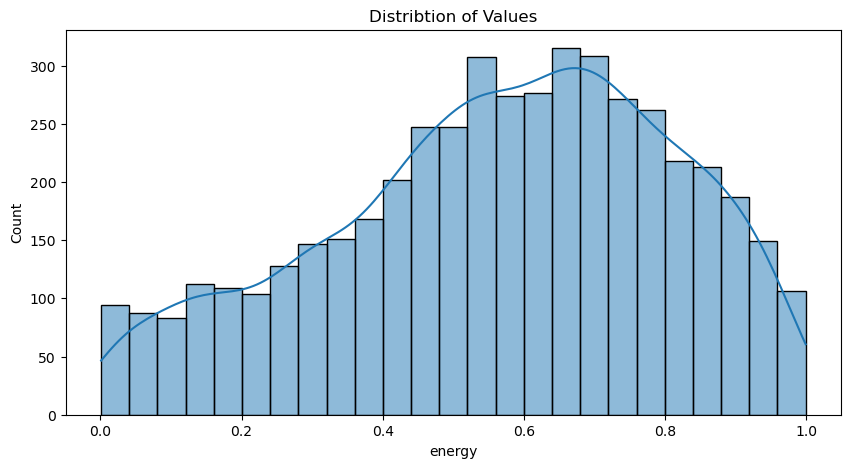

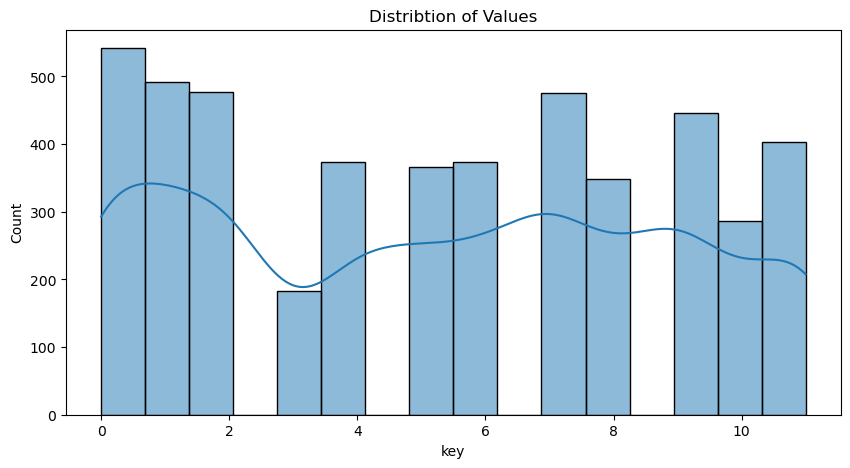

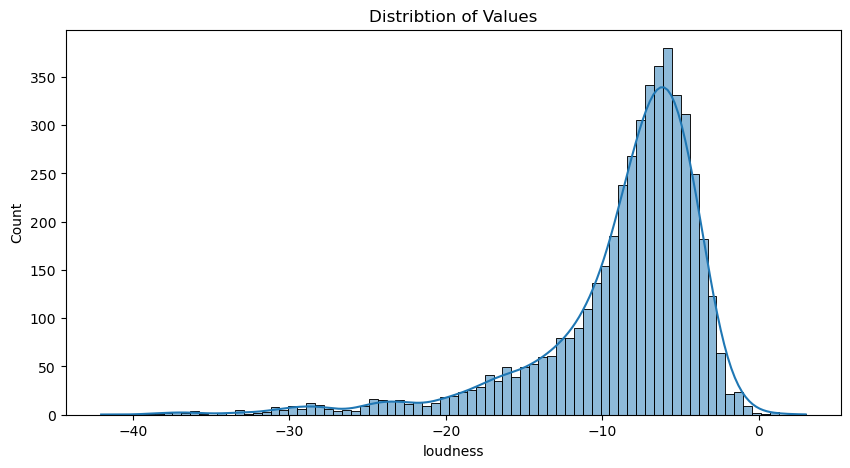

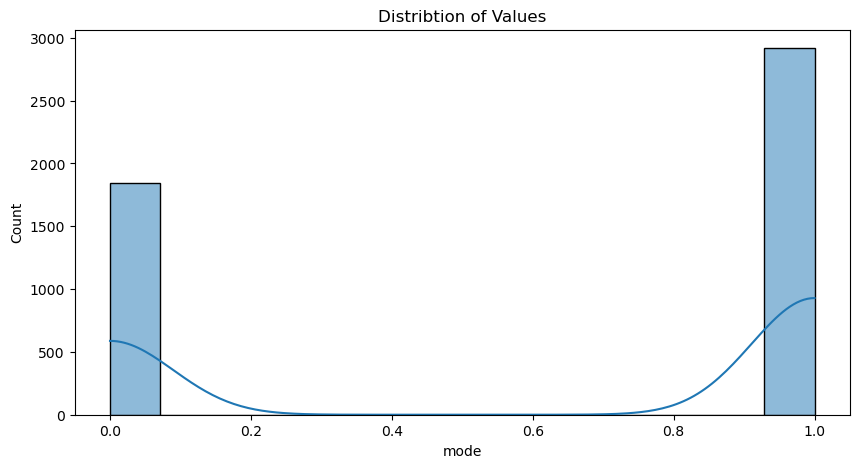

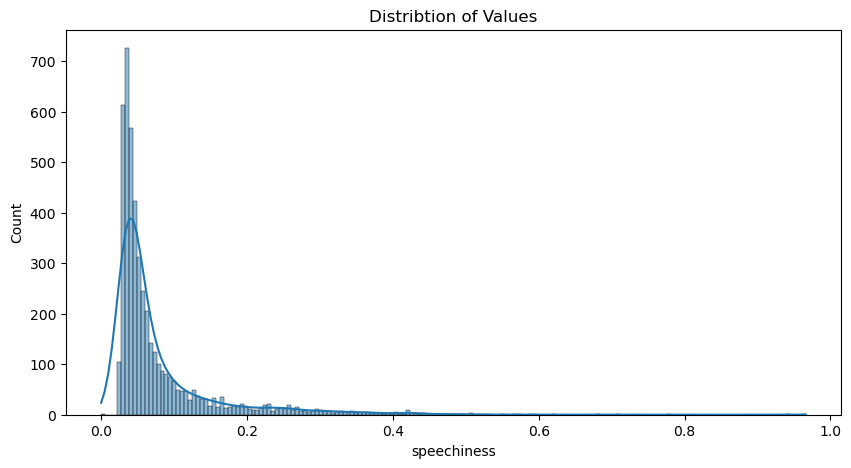

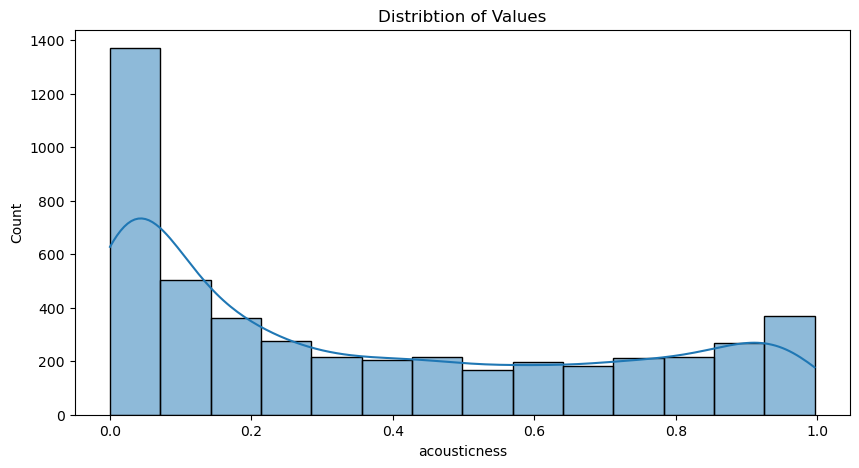

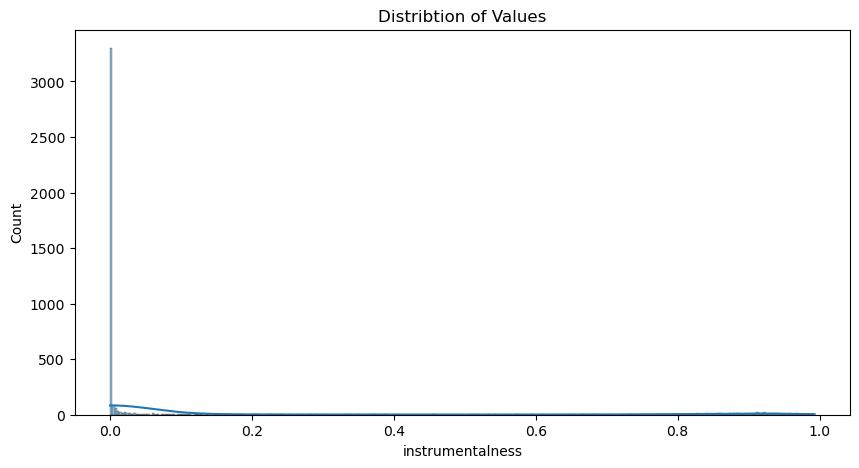

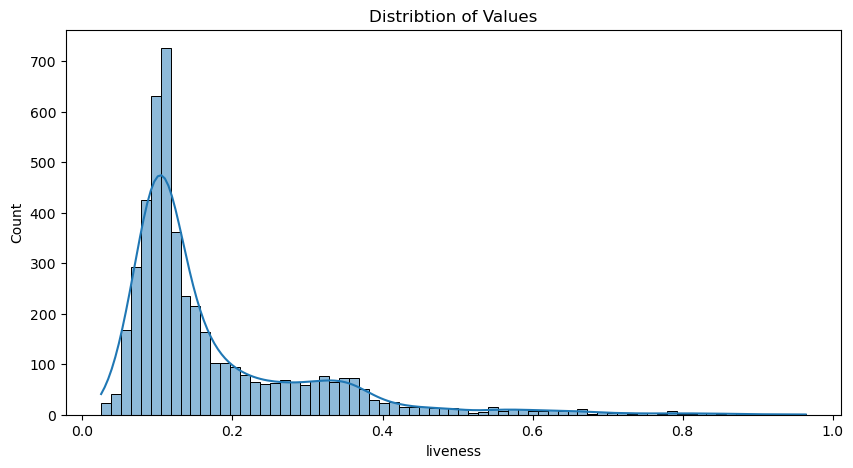

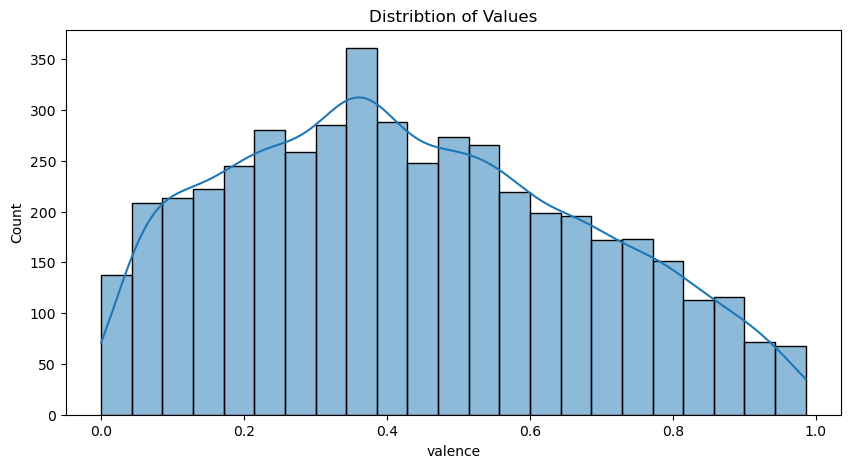

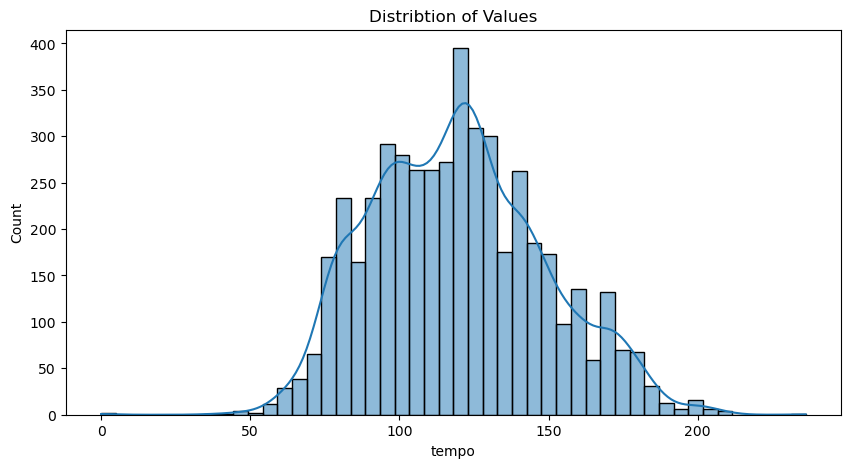

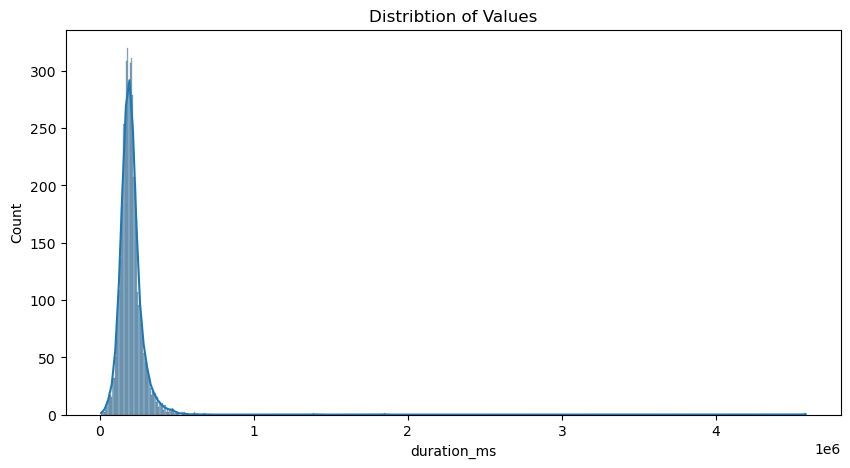

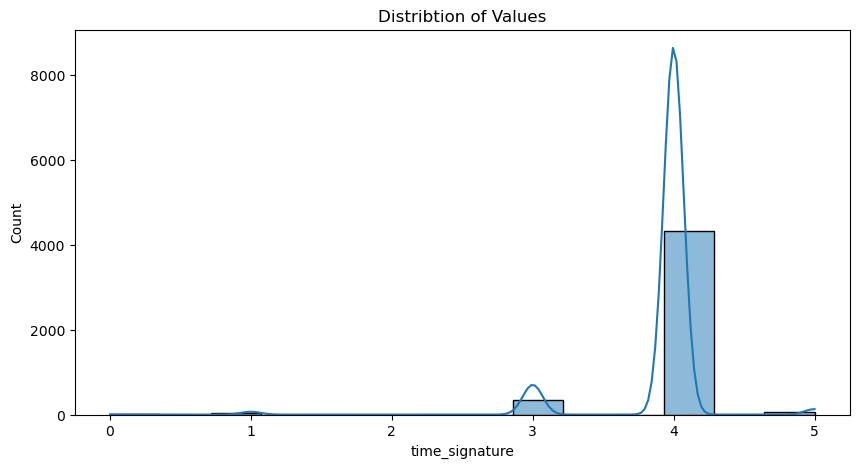

In [23]:
#plot dist for each num col

for column in num_col:
    plt.figure(figsize=(10,5))
    sns.histplot(df[column],kde=True)
    plt.title('Distribtion of Values')
    plt.show()

**In the context of analyzing music data, outliers might represent unique or distinctive songs that could be of particular interest. For example, a song with an unusually high 'speechiness' value might be a spoken word track or a podcast, while a song with an unusually long 'duration_ms' might be a live concert recording or a classical symphony. Removing these outliers could potentially eliminate interesting patterns or trends in the data. Therefore, it might be more appropriate to leave the outliers in the data,**

<Axes: >

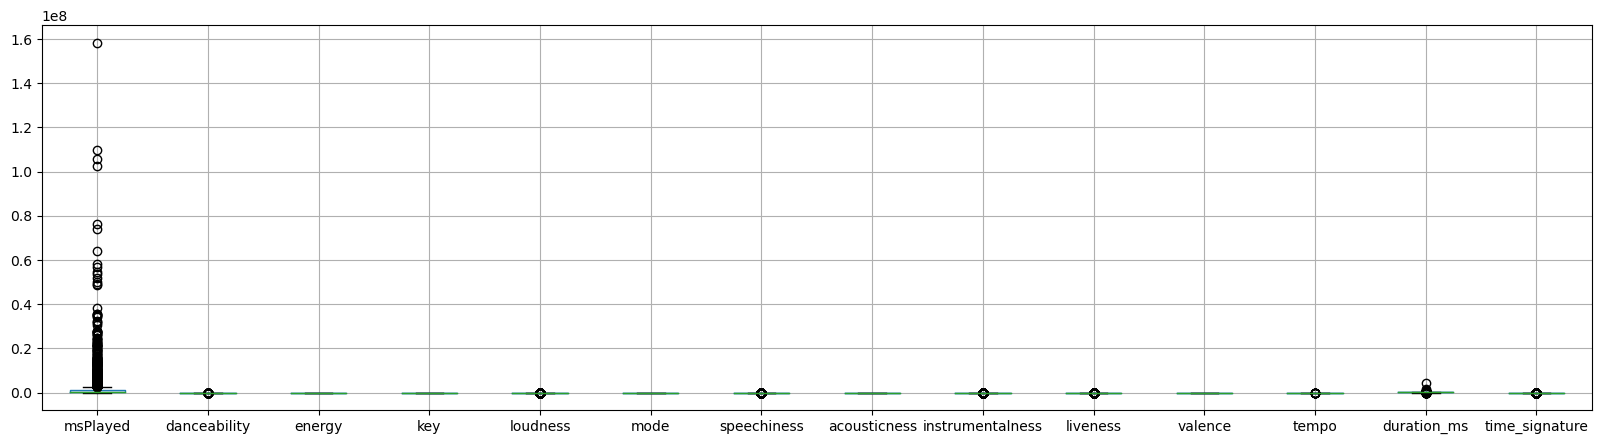

In [24]:
plt.figure(figsize=(20,5))
df.boxplot()

In [25]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_columns

['msPlayed',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

<Axes: xlabel='msPlayed'>

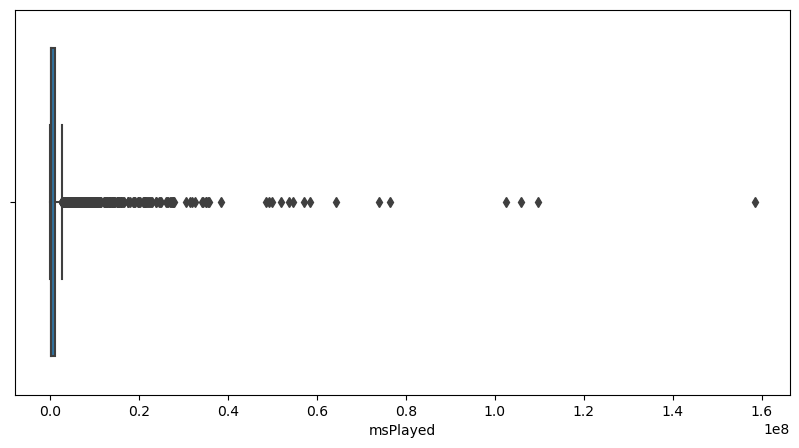

In [26]:
plt.figure(figsize=(10,5))

sns.boxplot(x='msPlayed',data=df)



The msPlayed field represents the duration of the song that was actually played. The fact that most of the values are clustered around the lower end could indicate that users often skip songs before they finish, or listen to only a part of the song.high values stretching the boxplot to the top could represent instances where users listened to the entire song.
These could be seen as outliers in the context of the overall distribution, but they are not necessarily  problematic as they could simply represent a different listening behavior. Therefore, I am not removing outliers from the most played field.








<Axes: xlabel='danceability'>

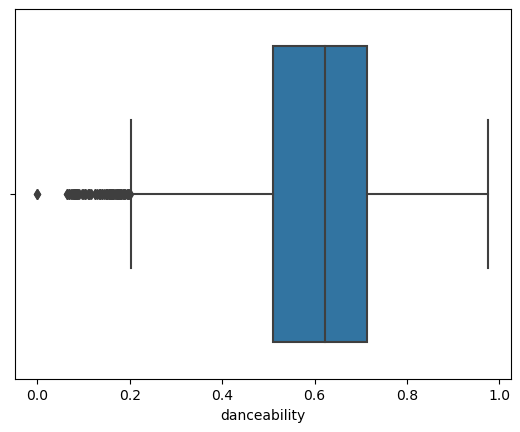

In [27]:
sns.boxplot(x='danceability',data=df)


**Again this is a music characteristic indicate how danceable the song is. In this case these cannot necessarily be called out as outliers since the data can have songs with lesser danceability.**

<Axes: xlabel='energy'>

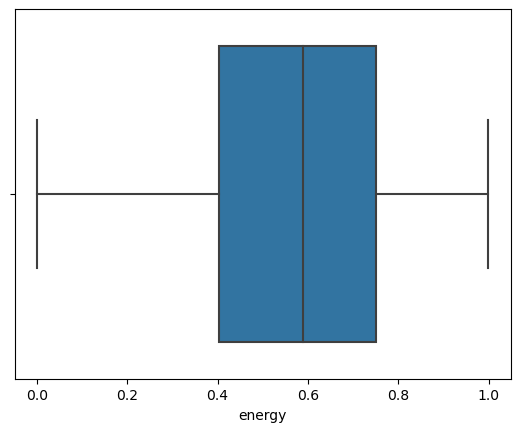

In [28]:
sns.boxplot(x='energy',data=df)

**The boxplot for energy indicate most songs are energetic**

<Axes: xlabel='loudness'>

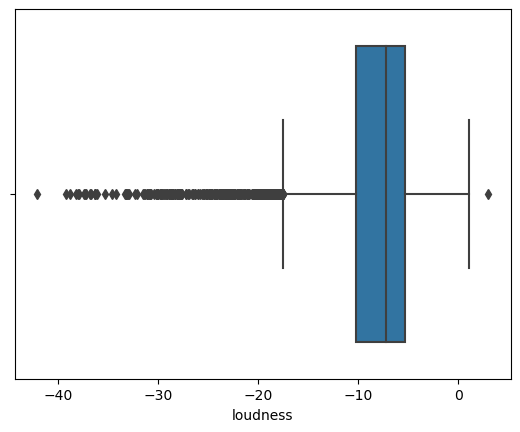

In [29]:
sns.boxplot(x='loudness',data=df)


**The loudness value in the Spotify dataset is measured in decibels (dB). It's not unusual for these values to be negative. In fact, in audio processing, it's common to see negative values for loudness. This is because decibels are a logarithmic unit, and the loudness of a track is a relative measure.** 

Sources: 

- https://support.spotify.com/se/artists/article/loudness-normalization/
- https://isaacyu1-96734.medium.com/loudness-wars-spotify-song-analysis-d3f48bfe3ebe

<Axes: xlabel='mode'>

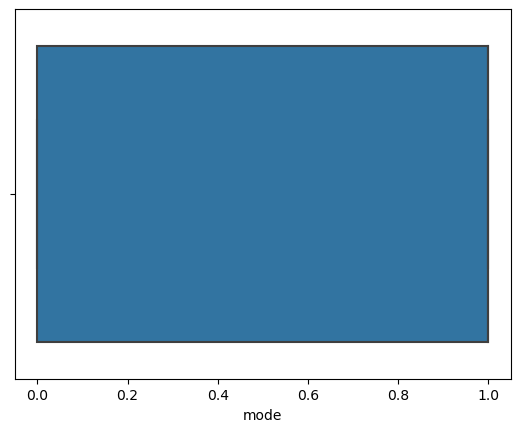

In [30]:
sns.boxplot(x='mode',data=df)


<Axes: xlabel='acousticness'>

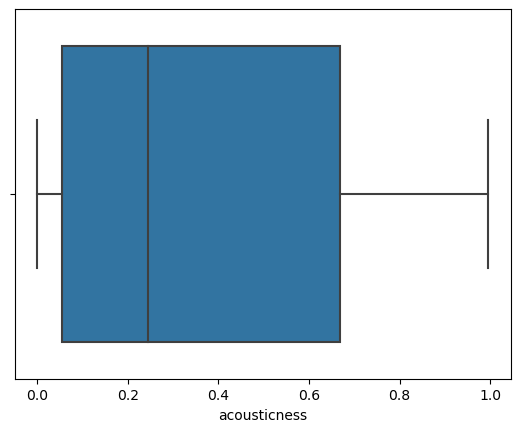

In [31]:
sns.boxplot(x='acousticness',data=df)

<Axes: xlabel='instrumentalness'>

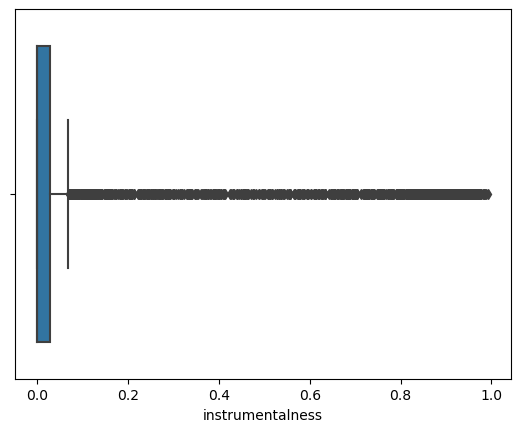

In [32]:
sns.boxplot(x='instrumentalness',data=df)

Instru variables indicates whether a track contains no vocals. for exmaple if the values are closer to 1 then it suggests the likelihood of track containing zero vocals is high. 

in this dataset, it seems a large number of values have some vocals and outliers are being marked as tracked that are actually instrumental. 

<Axes: xlabel='liveness'>

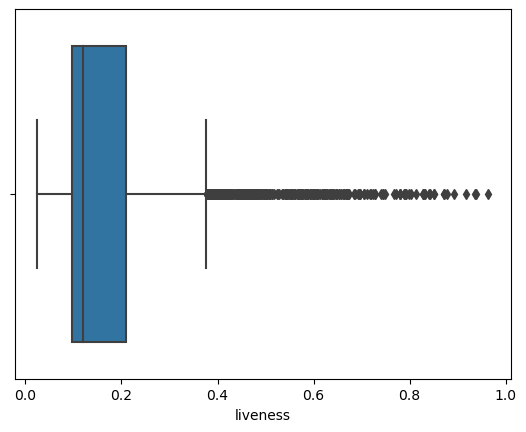

In [33]:
sns.boxplot(x='liveness',data=df)

<Axes: xlabel='valence'>

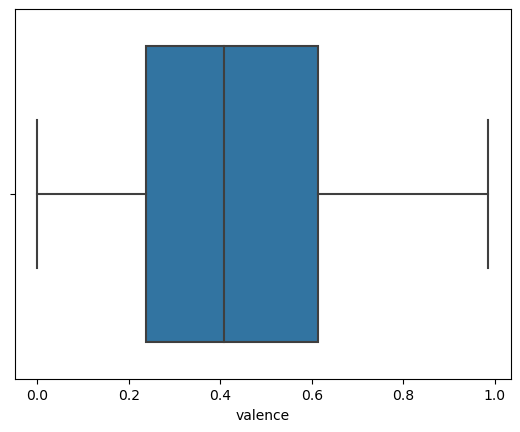

In [34]:
sns.boxplot(x='valence',data=df)

<Axes: xlabel='tempo'>

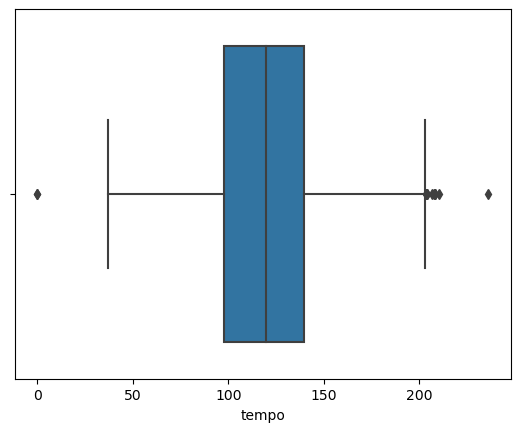

In [35]:
sns.boxplot(x='tempo',data=df)

<Axes: xlabel='duration_ms'>

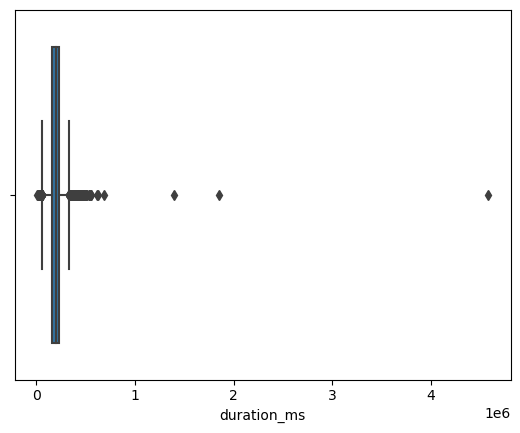

In [36]:
sns.boxplot(x='duration_ms',data=df)

<Axes: xlabel='time_signature'>

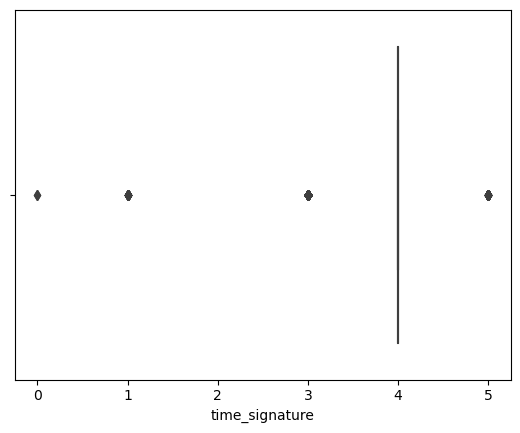

In [37]:
sns.boxplot(x='time_signature',data=df)

The data shows some sorts of outliers, but these are musical characteristics and are bound to have some outliers. WE can have a better understanding with a bi and multivariate analysis. 

### Lets find out the top 10 and least fav tracks. I will base this information on msplayed

In [38]:
popular_tracks_top10 = df.sort_values('msPlayed', ascending=False).head(10)
popular_tracks_top10[['trackName','artistName','genre']]

,trackName,artistName,genre
4194,Sparkle - movie ver.,RADWIMPS,j-pop
1001,色香水,Yoh kamiyama,japanese teen pop
2058,Gone,Blake Rose,australian electropop
2890,Lonely City,Mokita,chill pop
4559,This Town (feat. Sasha Alex Sloan),Kygo,edm
4802,Wannabe - Sped Up Version,why mona,la pop
4709,Until I Found You,Stephen Sanchez,gen z singer-songwriter
1771,Eye-Water,Hiroyuki Sawano,anime score
4946,Without Me,Eminem,detroit hip hop
359,BYE,Jaden,pop rap


In [39]:
popular_tracks_bottom10 = df.sort_values('msPlayed',ascending=True).tail(10)
popular_tracks_bottom10[['trackName','artistName','genre','msPlayed']]

,trackName,artistName,genre,msPlayed
359,BYE,Jaden,pop rap,54688953
4946,Without Me,Eminem,detroit hip hop,56975970
1771,Eye-Water,Hiroyuki Sawano,anime score,58340251
4709,Until I Found You,Stephen Sanchez,gen z singer-songwriter,64160505
4802,Wannabe - Sped Up Version,why mona,la pop,73878220
4559,This Town (feat. Sasha Alex Sloan),Kygo,edm,76360841
2890,Lonely City,Mokita,chill pop,102503285
2058,Gone,Blake Rose,australian electropop,105798353
1001,色香水,Yoh kamiyama,japanese teen pop,109652914
4194,Sparkle - movie ver.,RADWIMPS,j-pop,158367130


**The dataset is too huge to conduct each analysis with infinite possibilities. But my business questions I want to answer is that how can I create targetted ad groups. First I need to understand how spotify decides on creating targetted ads. A general understanding is analyzing users listening habits like genres, prefered artists, time spent listening to music, etc.**



# Bi and Multivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


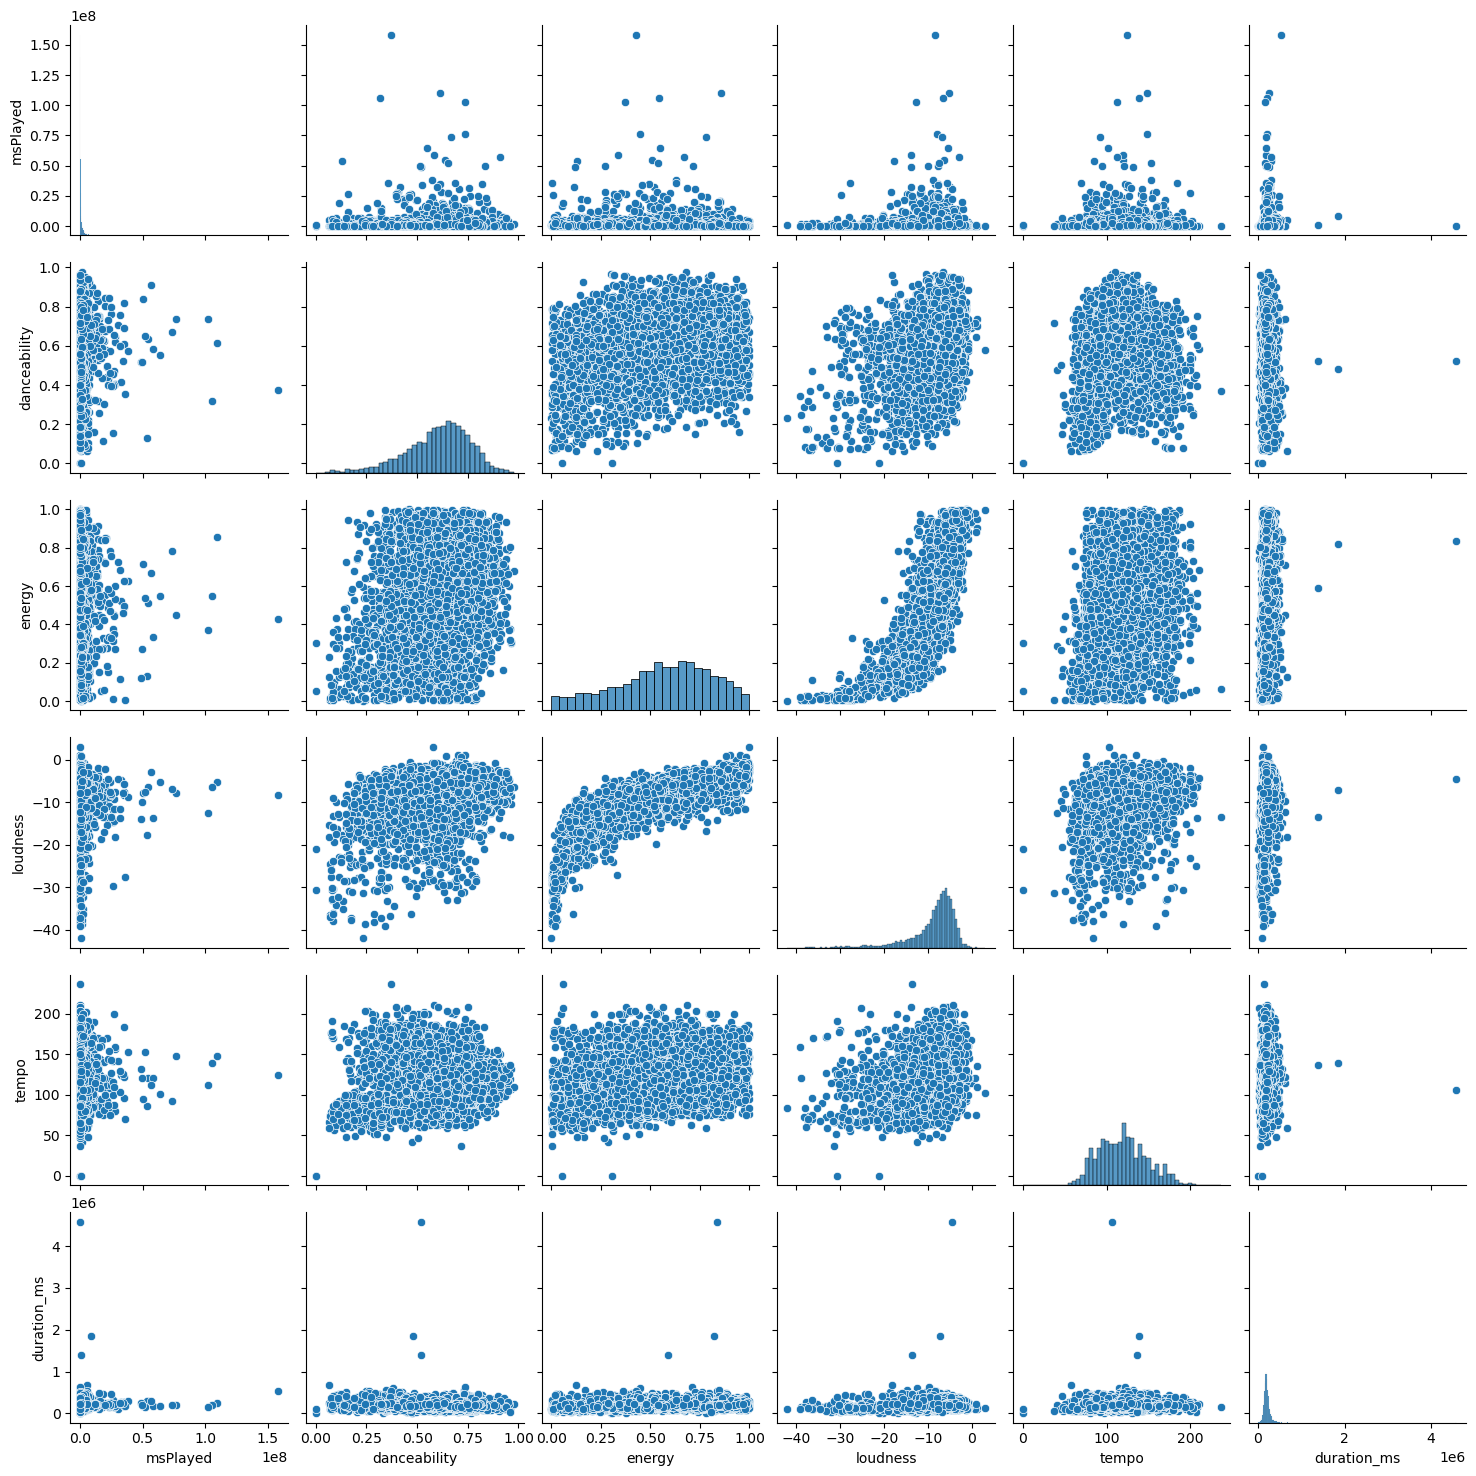

In [40]:
num_vars = ['msPlayed', 'danceability', 'energy', 'loudness', 'tempo', 'duration_ms']

sns.pairplot(df[num_vars])


/tmp/ipykernel_20/331188534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

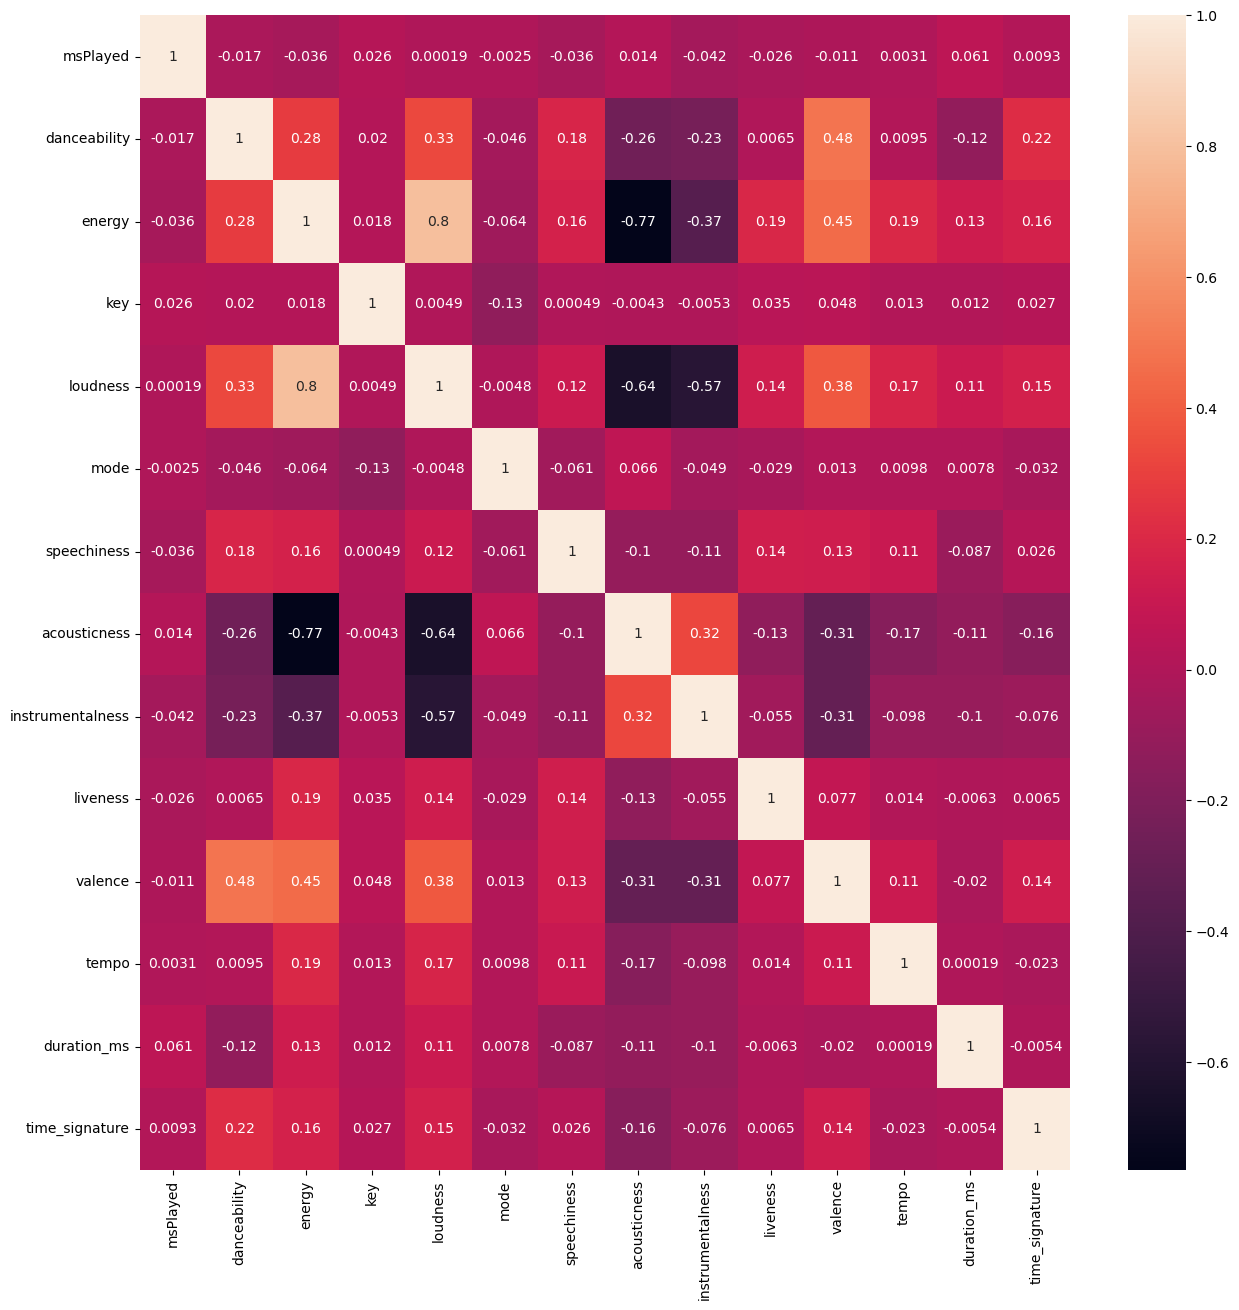

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [42]:
df.skew()

/tmp/ipykernel_20/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


msPlayed            13.602526
danceability        -0.665516
energy              -0.383628
key                  0.031374
loudness            -2.055256
mode                -0.461477
speechiness          3.321574
acousticness         0.546091
instrumentalness     1.786990
liveness             2.184980
valence              0.258521
tempo                0.293597
duration_ms         21.838495
time_signature      -4.106543
dtype: float64

**I am plannig to use this data to create broad user segments, and hence have decided to drop a few columns that likely to be useful for a clustering analysis based on the musical characteristics and listening patterns.**

In [43]:
df.columns

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [44]:
#drop key and time_sig

df1 =  df.drop(['time_signature', 'key','track_href','analysis_url','id','uri','uri','type'], axis=1)
df1

,trackName,artistName,msPlayed,genre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,"""Honest""",Nico Collins,191772,Unknown,0.476,0.799,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,191948.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,150827.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,145611.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,89509.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,280400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,-16.992,1.0,0.0331,0.9610,0.005720,0.1100,0.245,131.118,222827.0
5036,Your Latest Trick - Remastered 1996,Dire Straits,304382,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5037,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,-7.783,1.0,0.0311,0.4380,0.134000,0.4740,0.248,65.152,112582.0
5038,Your Power,Billie Eilish,988224,art pop,0.632,0.284,-14.025,0.0,0.0801,0.9320,0.000476,0.2330,0.208,129.642,245897.0


In [45]:
df.isnull().sum()

trackName             0
artistName            0
msPlayed              0
genre                 0
danceability        275
energy              275
key                 275
loudness            275
mode                275
speechiness         275
acousticness        275
instrumentalness    275
liveness            275
valence             275
tempo               275
type                275
id                  275
uri                 275
track_href          275
analysis_url        275
duration_ms         275
time_signature      275
dtype: int64

**I ll handle these missing values. Using median, since some variables have outliers, and mean is sensitive to outliers can skew our data further.Another reason for imputing and not dropping is that the dataset has only 5% missing values, which is a good enough threshold to decide imputation** 

In [46]:
for i in df1.select_dtypes(include=np.number).columns.tolist():
    df1[i].fillna(df1[i].median(), inplace=True)
    
df1.isnull().sum()

trackName           0
artistName          0
msPlayed            0
genre               0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [47]:
df.skew()

/tmp/ipykernel_20/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


msPlayed            13.602526
danceability        -0.665516
energy              -0.383628
key                  0.031374
loudness            -2.055256
mode                -0.461477
speechiness          3.321574
acousticness         0.546091
instrumentalness     1.786990
liveness             2.184980
valence              0.258521
tempo                0.293597
duration_ms         21.838495
time_signature      -4.106543
dtype: float64

- msPlayed is highly positively skewed
- danceability, energy, loudness, and mode are negatively skewed
- speechiness, acousticness, instrumentalness, and liveness are positively skewed
- valence is slightly positively skewed

the skewness values suggest that there are some songs that are quite different from the rest in terms of their musical characteristics and play durations. These could potentially be outliers that might affect the results of your analysis.

I wish to cluster data based on music attributes, but clustering alog such k-means are sensitive to outliers. But the outliers in our data are not erroneous and hence I do not wish to remove them.  Therefore I found another solution to this. We can use other robust clustering algos like dbscan. or another way is to scale the data, to lower the impact of outliers. or use PCA or log transformations.

I am moving forward with feature scaling, because a] less complicated and easy to interprete b] I am clustering data

In [48]:
from sklearn.preprocessing import StandardScaler 

In [49]:
scaler = StandardScaler()

df1_scaled = scaler.fit_transform(df1.select_dtypes(include=np.number))
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.select_dtypes(include=np.number).columns)
df1_scaled.head()

,msPlayed,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.249740,-0.831503,0.988251,0.694946,-1.314819,1.729130,-1.043280,-0.472714,0.668835,0.610997,1.516160,-0.112739
1,0.053897,-0.838020,-1.836097,-1.727677,0.760561,-0.329964,1.715383,2.647029,-0.552295,-1.316136,-0.253919,-0.553781
2,-0.258421,0.569662,1.051577,0.913133,-1.314819,0.514136,-1.042667,-0.472714,1.522060,0.322986,0.447437,-0.609725
3,-0.281094,0.133020,0.131237,-0.227281,0.760561,-0.580636,0.363338,0.189742,-0.411395,1.962108,0.055698,-1.211445
4,0.749526,0.139537,0.680064,-0.530204,-1.314819,-0.414374,-1.044507,-0.472163,-0.853664,0.314515,0.196742,0.835950


### Lets check if the data is suitable for clustering

<Axes: >

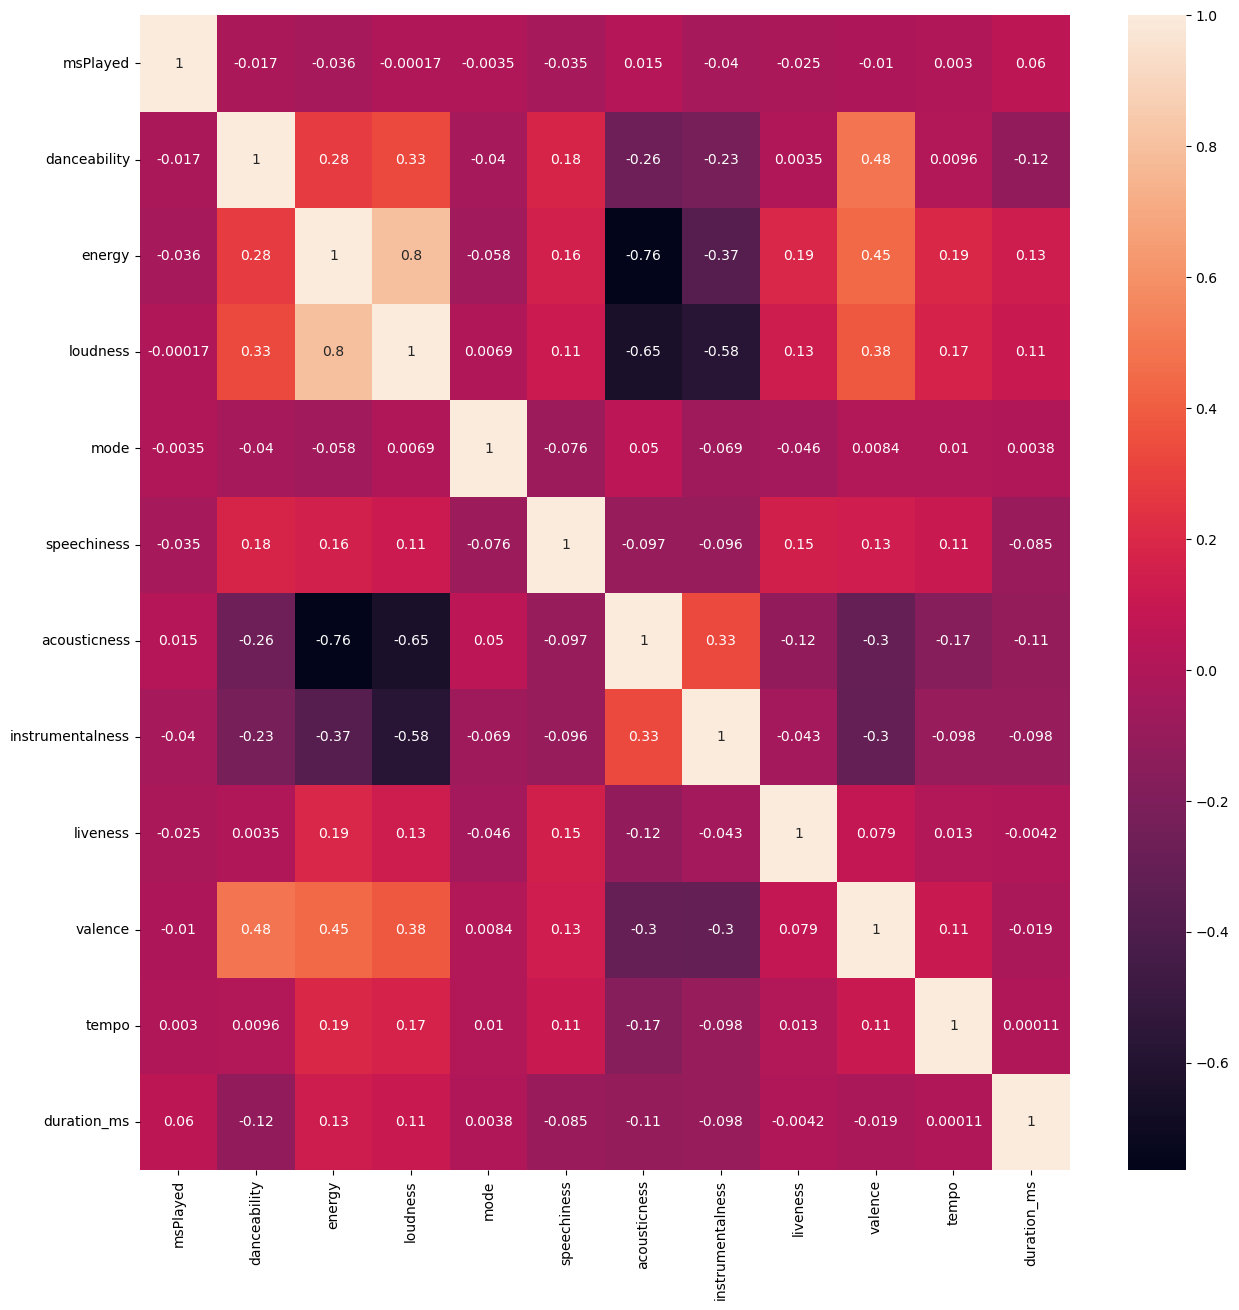

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(df1_scaled.corr(), annot=True)

- energy and loudness are highly correlated, they provide similar information to a clustering algorithm,
- similarly enery and accousticness shows strong -ve correlation 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

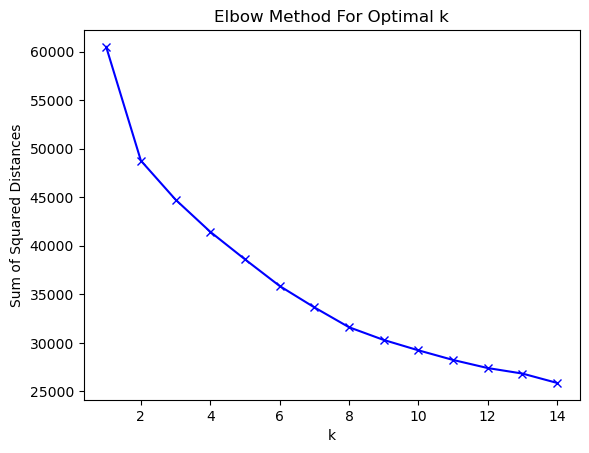

In [51]:
#clustering using elbow method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# List to hold the sum of squared distances
ssd = []
# Range of k values to try
k_range = range(1, 15)
for k in k_range:
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the scaled data
    model.fit(df1_scaled)
    ssd.append(model.inertia_)
plt.plot(k_range, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()